# %%
#  Plots on selected model 

* model: (50t,600,10)
* scale: 125

In [1]:
import pandas as pd 
import numpy as np
from helpers import potus
import glob
import re
import os

import matplotlib.pyplot as plt
import seaborn as sns

importing helper functions


In [2]:
import imp
imp.reload(potus)

<module 'helpers.potus' from '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ilab2-aj/code/Users/12823819/ilab2/helpers/potus.py'>

In [3]:
# %%
import helpers.process as process
from helpers import io as pickle_io
from gensim.models import ldamodel
from gensim.models import CoherenceModel
import pyLDAvis
import tqdm
from helpers import potus
import gc
import logging
import numpy as np
logging.basicConfig(format=logging.BASIC_FORMAT, level=logging.INFO)


root_folder = potus.rootFolder('potus_50t_600_10')

lda_model_fn = root_folder + '/lda.model'
print(f'load lda model from {lda_model_fn}')
lda_model = ldamodel.LdaModel.load(lda_model_fn)

INFO:gensim.utils:loading LdaModel object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model


load lda model from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model


INFO:gensim.utils:loading expElogbeta from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.expElogbeta.npy with mmap=None
INFO:gensim.utils:setting ignored attribute id2word to None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading LdaState object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state


In [4]:
# %%
#  print topics and top terms in topic
def print_topic(lda_model, topicid, n):
    topic_terms = lda_model.get_topic_terms(topicid, topn=n)
    terms = list()
    probs = list()
    for termid, prob in topic_terms:
        term = lda_model.id2word.get(termid)
        terms.append(term)
        probs.append(prob)
    terms = ' '.join(terms)
    print(f'Topic {topicid:02}: {terms}')

    
#  print topics and top terms in topic
def get_topic(lda_model, topicid, n):
    topic_terms = lda_model.get_topic_terms(topicid, topn=n)
    terms = list()
    probs = list()
    for termid, prob in topic_terms:
        term = lda_model.id2word.get(termid)
        terms.append(term)
        probs.append(prob)
    terms = ' '.join(terms)
    return(f'Topic {topicid:02}: {terms}')
    

## (50t,600,10)

Load results for scales 125 and 25.

In [43]:
exp = 'potus_50t_600_10'
scales = [25, 50, 75, 100, 125]
result = potus.gridExpResult(exp, scales)

print(len(result.df))
print(len(result.settings))
display(result.settings)
display(result.df.groupby('Nw').speech.count())

INFO:gensim.utils:loading LdaModel object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading expElogbeta from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.expElogbeta.npy with mmap=None
INFO:gensim.utils:setting ignored attribute id2word to None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
INFO:gensim.utils:loading LdaState object from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state


load lda model from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model


INFO:gensim.utils:loaded /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model.state


load bow from  /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/bow.pkl
File exists and is readable
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_100_100.pkl
t: 50, Nw: 100, Tw:100
962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_125_125.pkl
t: 50, Nw: 125, Tw:125
962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_25_25.pkl
t: 50, Nw: 25, Tw:25
962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_50_50.pkl
t: 50, Nw: 50, Tw:50
962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_75_75.pkl
t: 50, Nw: 75, Tw:75
962  before trim
4810
5


,kld_filename,topics,Nw,Tw,path
0,speeches_dfr_potus_50t_600_10_klds_100_100.pkl,50,100,100,/home/azureuser/cloudfiles/code/data/processin...
1,speeches_dfr_potus_50t_600_10_klds_125_125.pkl,50,125,125,/home/azureuser/cloudfiles/code/data/processin...
2,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...
3,speeches_dfr_potus_50t_600_10_klds_50_50.pkl,50,50,50,/home/azureuser/cloudfiles/code/data/processin...
4,speeches_dfr_potus_50t_600_10_klds_75_75.pkl,50,75,75,/home/azureuser/cloudfiles/code/data/processin...


Nw
25     962
50     962
75     962
100    962
125    962
Name: speech, dtype: int64

# Prepare ts object


a pandas data frame with a date column set as index. date is converted using `pd.to_datetime`

In [44]:
result.df.date = pd.to_datetime(result.df.date)

In [45]:
result.df.head()


,speaker,file_name,file_path,raw_tuple,title,date,speech,speech_len,probs,token_count,novelty,transience,resonance,kld_filename,topics,Nw,Tw,path,_merge
0,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,0.0,1.364406,-1.364406,speeches_dfr_potus_50t_600_10_klds_100_100.pkl,50,100,100,/home/azureuser/cloudfiles/code/data/processin...,both
1,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,0.0,1.452682,-1.452682,speeches_dfr_potus_50t_600_10_klds_50_50.pkl,50,50,50,/home/azureuser/cloudfiles/code/data/processin...,both
2,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,0.0,1.331562,-1.331562,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...,both
3,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,0.0,1.330279,-1.330279,speeches_dfr_potus_50t_600_10_klds_75_75.pkl,50,75,75,/home/azureuser/cloudfiles/code/data/processin...,both
4,washington,washington_speeches_000.txt,/home/azureuser/cloudfiles/code/data/raw/potus...,"(First Inaugural Address, 1789-04-30, Fellow C...",First Inaugural Address,1789-04-30,Fellow Citizens of the Senate and the House of...,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,0.0,1.319157,-1.319157,speeches_dfr_potus_50t_600_10_klds_125_125.pkl,50,125,125,/home/azureuser/cloudfiles/code/data/processin...,both


In [47]:
many_window_values = result.df.pivot_table(index='file_name', values = ['novelty', 'transience', 'resonance'], aggfunc='mean')

selected_columns = result.df[['speaker', 'file_name', 'raw_tuple', 'title', 'date',
       'speech', 'speech_len', 'probs', 'token_count']]

new_df = pd.DataFrame(selected_columns.copy())
print(new_df.head())

new_df = new_df.drop_duplicates(subset=['file_name'])
print(new_df.head())

new_df = pd.merge(new_df,
                 many_window_values,
                 on='file_name', 
                 how='left')

print(new_df.head())


      speaker                    file_name  \
0  washington  washington_speeches_000.txt   
1  washington  washington_speeches_000.txt   
2  washington  washington_speeches_000.txt   
3  washington  washington_speeches_000.txt   
4  washington  washington_speeches_000.txt   

                                           raw_tuple                    title  \
0  (First Inaugural Address, 1789-04-30, Fellow C...  First Inaugural Address   
1  (First Inaugural Address, 1789-04-30, Fellow C...  First Inaugural Address   
2  (First Inaugural Address, 1789-04-30, Fellow C...  First Inaugural Address   
3  (First Inaugural Address, 1789-04-30, Fellow C...  First Inaugural Address   
4  (First Inaugural Address, 1789-04-30, Fellow C...  First Inaugural Address   

        date                                             speech  speech_len  \
0 1789-04-30  Fellow Citizens of the Senate and the House of...        8687   
1 1789-04-30  Fellow Citizens of the Senate and the House of...        8687   

In [54]:
fname = '/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_avg_window_dfr_potus_50t_600_10_klds.pkl'

pickle_io.to_pickle(new_df, fname)



True

# Plot selected topics

In [122]:
topics_to_plot = [36, 0, 28,12,21]

In [123]:

col_labels = [t for t in topics_to_plot]

tot = []

for t in topics_to_plot:
    tot.append([row['probs'][t] for idx,row in result.df.iterrows()])

import pandas as pd

topicsot = pd.DataFrame(result.df['date'])
for i,t in enumerate(tot):
    topicsot[topics_to_plot[i]] = t
topicsot = topicsot.set_index('date')


topicsot.head()


,36,0,28,12,21
date,,,,,
1789-04-30,0.000067,0.000183,0.000094,0.000221,0.066029
1789-10-03,0.000204,0.000555,0.000286,0.000669,0.001098
1790-01-08,0.000108,0.000292,0.000151,0.000352,0.000579
1790-12-08,0.000065,0.000176,0.000091,0.000212,0.000347
1790-12-29,0.000080,0.000217,0.000112,0.000262,0.000430


In [124]:
sns.set(rc={'figure.figsize':(11, 4)})

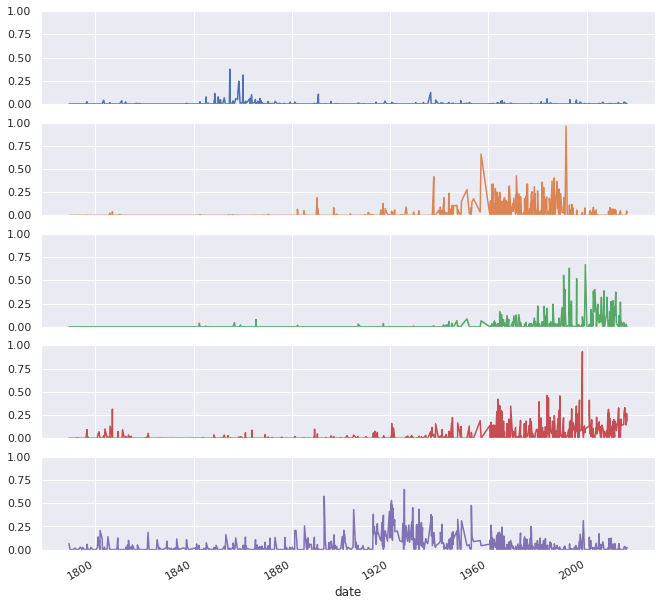

In [131]:
plot_cols = col_labels
g = topicsot[plot_cols].plot(figsize=(11, 11), subplots=True, ylim=(0,1), legend = None, )


# Now add topic info


In [127]:
[print_topic(lda_model,t, n=8) for t in topics_to_plot]

Topic 36: slavery slave territory compromise missouri principle nebraska union
Topic 00: soviet soviet_union communist agreement area negotiation treaty united_nation
Topic 28: iraq troop military region israel attack afghanistan iraqi
Topic 12: child today family dream promise live woman student
Topic 21: responsibility principle liberty justice human task thing wish


[None, None, None, None, None]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a4d817940>,
      dtype=object)

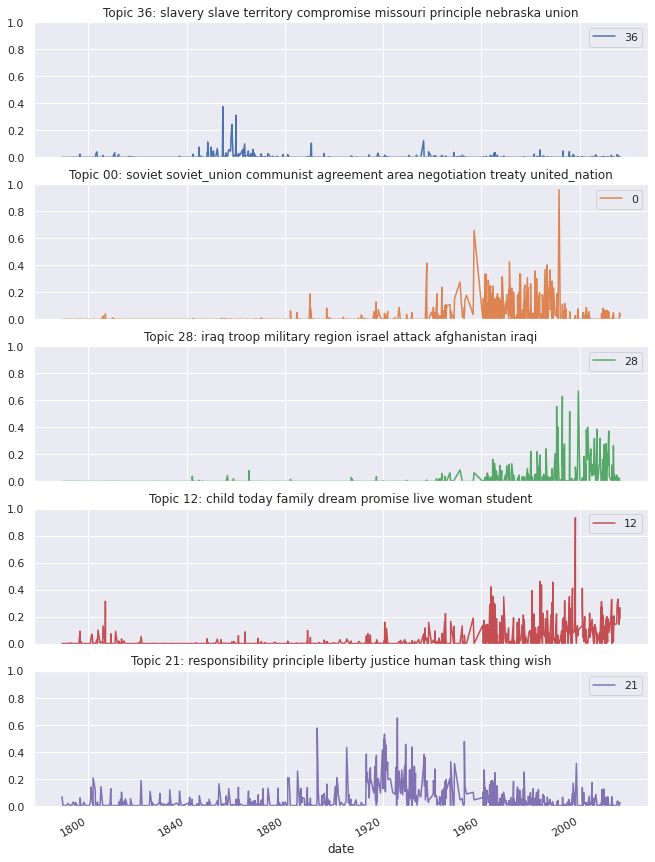

In [126]:

titles = [get_topic(lda_model,t, n=8) for t in topics_to_plot]

topicsot.plot(figsize=(11, 16), subplots=True, ylim=(0,1), title=titles)
    